In [9]:
from sklearn.datasets import load_breast_cancer
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import joblib
import numpy as np


EXLORATION

In [10]:
DB = load_breast_cancer()
DB_df=pd.DataFrame(DB.data,columns=DB.feature_names)
DB_df['target']=DB.target
print("Dimension de la Base : ",DB_df.shape)

data_type=dict()
for i in range (0,30):
    data_type[DB_df.columns[i]]=DB_df[DB_df.columns[i]].dtype
    
print("Types des données : ",data_type)
print()
#print("Aperçu de la Base : ",x.head())
Target=dict()
for i in range (0,2):
    Target[str(DB.target_names[i])]=i
print("Les classes du dataset: ",Target)
#print(DB_df.isnull())
print(DB_df.isnull().sum())
print("=>Il n'y a pas de valeurs manquantes dans la base de données")
print("===============================Statistiques descriptives=============================")
print(DB_df.describe())





Dimension de la Base :  (569, 31)
Types des données :  {'mean radius': dtype('float64'), 'mean texture': dtype('float64'), 'mean perimeter': dtype('float64'), 'mean area': dtype('float64'), 'mean smoothness': dtype('float64'), 'mean compactness': dtype('float64'), 'mean concavity': dtype('float64'), 'mean concave points': dtype('float64'), 'mean symmetry': dtype('float64'), 'mean fractal dimension': dtype('float64'), 'radius error': dtype('float64'), 'texture error': dtype('float64'), 'perimeter error': dtype('float64'), 'area error': dtype('float64'), 'smoothness error': dtype('float64'), 'compactness error': dtype('float64'), 'concavity error': dtype('float64'), 'concave points error': dtype('float64'), 'symmetry error': dtype('float64'), 'fractal dimension error': dtype('float64'), 'worst radius': dtype('float64'), 'worst texture': dtype('float64'), 'worst perimeter': dtype('float64'), 'worst area': dtype('float64'), 'worst smoothness': dtype('float64'), 'worst compactness': dtype('

Visualisation

===============================VISUALISATION=============================


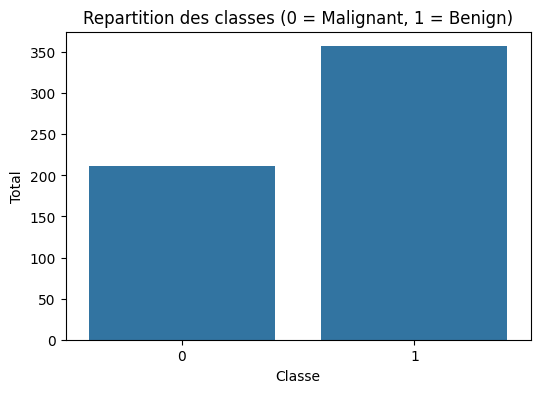

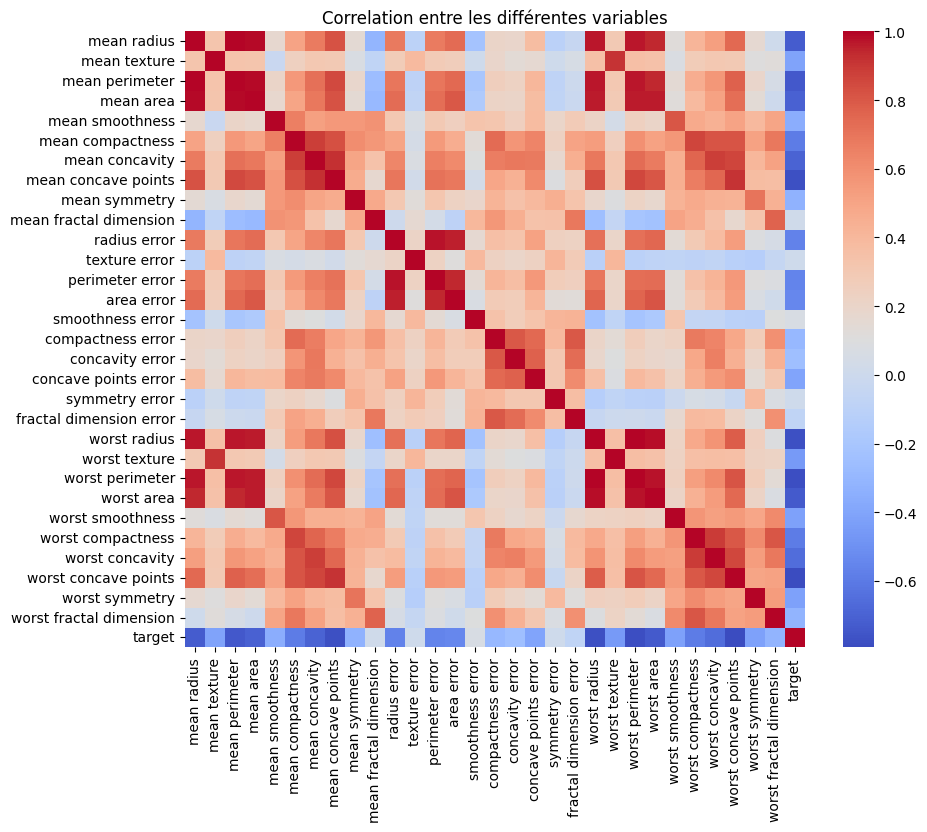

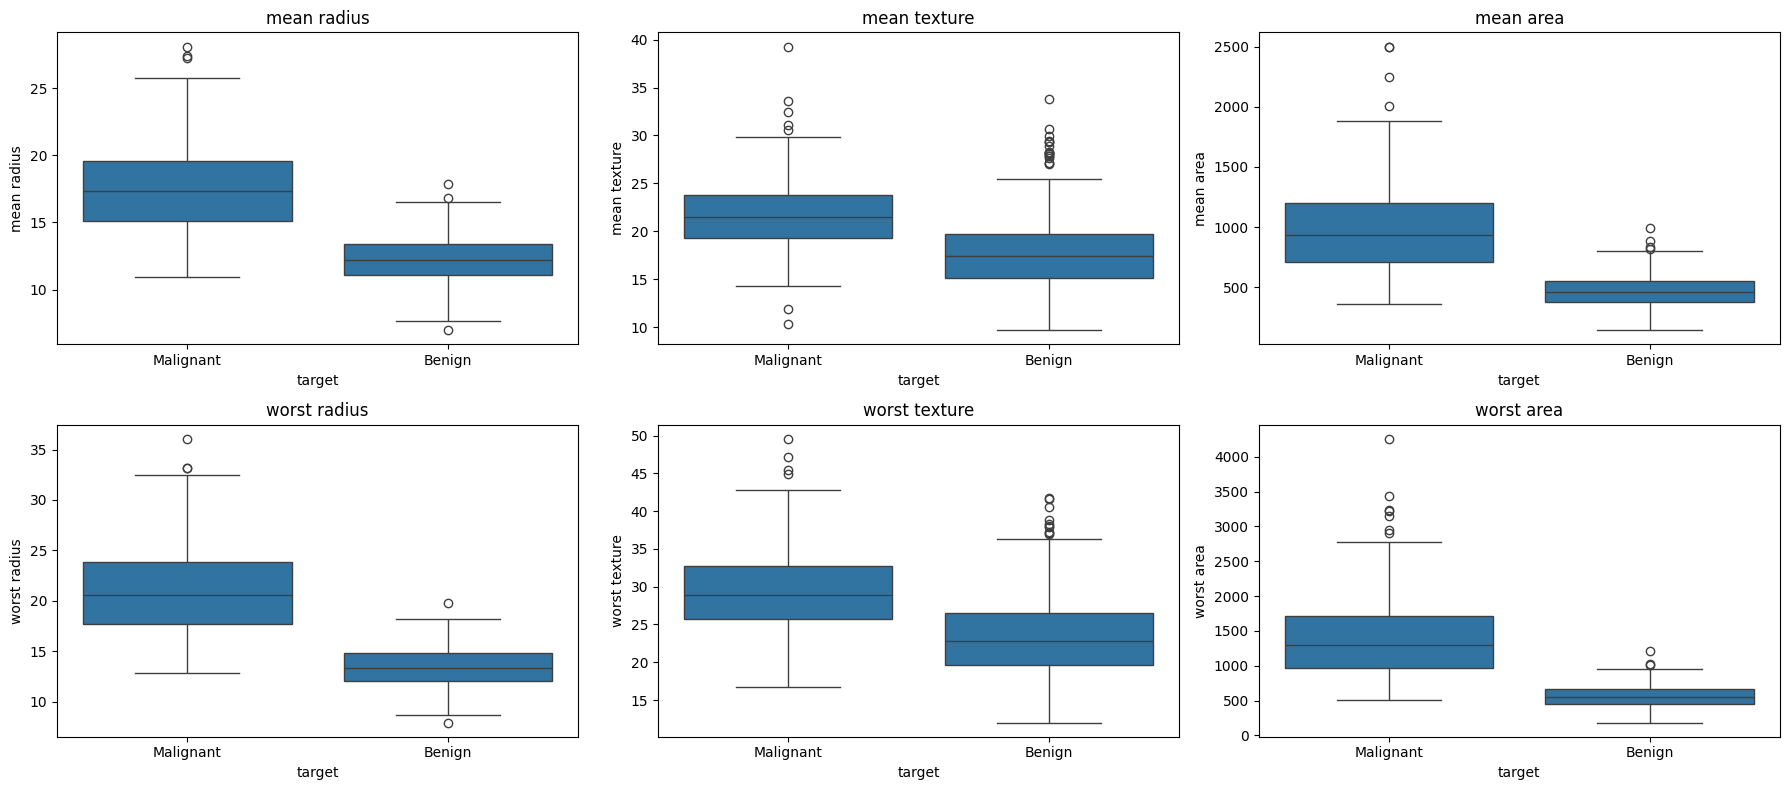

In [11]:
print("===============================VISUALISATION=============================")
plt.figure(figsize=(6,4))
sns.countplot(x=DB_df["target"])

plt.title("Repartition des classes (0 = Malignant, 1 = Benign)")
plt.xlabel("Classe")
plt.ylabel("Total")
plt.show()



vars_princ = [
    "mean radius",
    "mean texture",
    "mean perimeter",
    "mean area",
    "mean smoothness"
]

plt.figure(figsize=(10,8))
sns.heatmap(DB_df.corr(), cmap="coolwarm")
plt.title("Correlation entre les différentes variables")


vars_to_plot = [
    "mean radius", 
    "mean texture", 
    "mean area", 
    "worst radius", 
    "worst texture", 
    "worst area"
]

plt.figure(figsize=(18,8))
for i, var in enumerate(vars_to_plot, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns
    sns.boxplot(x=DB_df["target"], y=DB_df[var])
    plt.xticks([0,1], ["Malignant", "Benign"])
    plt.title(var)

plt.tight_layout()
plt.show()



PRETRAITEMENT

In [12]:
x=DB_df.drop("target", axis=1)
y=DB_df["target"]
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=5)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # fit on train
X_test_scaled = scaler.transform(X_test) 
joblib.dump(scaler, 'scaler_breast_cancer.pkl')


['scaler_breast_cancer.pkl']

MODELISATION

In [13]:
model1=KNeighborsClassifier(n_neighbors=5)
model2=RandomForestClassifier(n_estimators=100,random_state=5)
model1.fit(X_train_scaled,y_train)
model2.fit(X_train_scaled,y_train)
print("===============================SCORE KNN=============================")
print(model1.score(X_test_scaled,y_test))
print("===============================SCORE RANDOM FOREST=============================")
print(model2.score(X_test_scaled,y_test))


===============================SCORE KNN=============================
0.9590643274853801
===============================SCORE RANDOM FOREST=============================
0.9766081871345029


EVALUATION

In [14]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,fbeta_score,precision_score,recall_score
y_pred1=model1.predict(X_test_scaled)
y_pred2=model2.predict(X_test_scaled)
print("===============================CLASSIFICATION REPORT KNN=============================")
print("accuracy=",accuracy_score(y_test,y_pred1))
print("F1 SCORE=",fbeta_score(y_test,y_pred1,beta=1))
print("PRECISION=",precision_score(y_test,y_pred1))
print("RECALL=",recall_score(y_test,y_pred1))
print("classification report KNN:\n",classification_report(y_test,y_pred1))
print("===============================CLASSIFICATION REPORT RANDOM FOREST=============================")
print("accuracy=",accuracy_score(y_test,y_pred2))
print("F1 SCORE=",fbeta_score(y_test,y_pred2,beta=1))
print("PRECISION=",precision_score(y_test,y_pred2))
print("RECALL=",recall_score(y_test,y_pred2))
print("classification report RANDOM FOREST:\n",classification_report(y_test,y_pred2))



===============================CLASSIFICATION REPORT KNN=============================
accuracy= 0.9590643274853801
F1 SCORE= 0.968609865470852
PRECISION= 0.9557522123893806
RECALL= 0.9818181818181818
classification report KNN:
               precision    recall  f1-score   support

           0       0.97      0.92      0.94        61
           1       0.96      0.98      0.97       110

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.95       171
weighted avg       0.96      0.96      0.96       171

===============================CLASSIFICATION REPORT RANDOM FOREST=============================
accuracy= 0.9766081871345029
F1 SCORE= 0.9819819819819819
PRECISION= 0.9732142857142857
RECALL= 0.990909090909091
classification report RANDOM FOREST:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97        61
           1       0.97      0.99      0.98       110

    accuracy                     

===============================CONFUSION MATRIX KNN=============================
[[ 56   5]
 [  2 108]]
===============================CONFUSION MATRIX RANDOM FOREST=============================
[[ 58   3]
 [  1 109]]


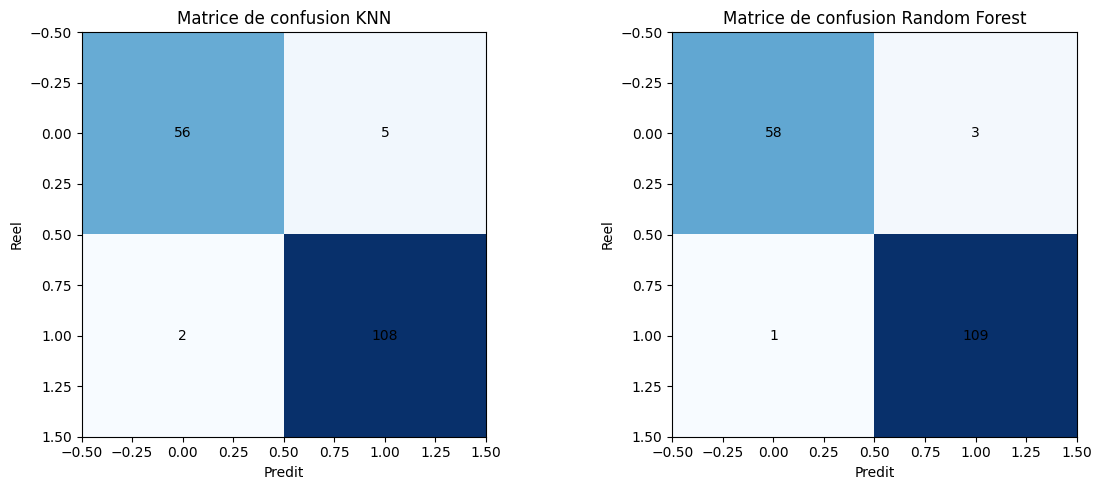

=================> Random Forest a une meilleure performance que KNN sur ce dataset.
Random Forest a un score plus élevé et de meilleures métriques d'évaluation
telles que la précision, le rappel et le F1-score ainsi que la matrice de confusion.
Cela suggère que Random Forest est plus efficace pour classer les échantillons
de cancer du sein dans cette base de données spécifique.


['random_forest_breast_cancer_model.pkl']

In [15]:
print("===============================CONFUSION MATRIX KNN=============================")
print(confusion_matrix(y_test,y_pred1))
print("===============================CONFUSION MATRIX RANDOM FOREST=============================")
print(confusion_matrix(y_test,y_pred2))
cm_knn = confusion_matrix(y_test, y_pred1)
cm_rf = confusion_matrix(y_test, y_pred2)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

titles = ["Matrice de confusion KNN", "Matrice de confusion Random Forest"]
cms = [cm_knn, cm_rf]

for ax, cm, title in zip(axes, cms, titles):
    im = ax.imshow(cm, cmap="Blues")

    # Add values on the cells
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, cm[i, j], ha="center", va="center", color="black")

    ax.set_title(title)
    ax.set_xlabel("Predit")
    ax.set_ylabel("Reel")

plt.tight_layout()
plt.show()
print("=================> Random Forest a une meilleure performance que KNN sur ce dataset.")
print("Random Forest a un score plus élevé et de meilleures métriques d'évaluation")
print("telles que la précision, le rappel et le F1-score ainsi que la matrice de confusion.")
print("Cela suggère que Random Forest est plus efficace pour classer les échantillons")
print("de cancer du sein dans cette base de données spécifique.")

import joblib
joblib.dump(model2, 'random_forest_breast_cancer_model.pkl')


TACHE FINALE: CREATION D'UNE FONCTION DE TEST

In [16]:
def tester(x):
    model=joblib.load('random_forest_breast_cancer_model.pkl')
    scaler=joblib.load('scaler_breast_cancer.pkl')  
    x = np.array(x).reshape(1, -1)
    X_scaled = scaler.transform(x)
    prediction=model.predict(X_scaled)[0]
    if (prediction==0):
        print("La tumeur est Maligne")
    else:
        print("La tumeur est Benigne")
    
sample_benign = [
    12.3, 14.8, 78.0, 470.0, 0.075, 0.040, 0.025, 0.020, 0.160, 0.064,
    0.25, 0.85, 1.65, 19.0, 0.005, 0.010, 0.008, 0.006, 0.020, 0.003,
    13.0, 15.5, 82.0, 520.0, 0.090, 0.050, 0.032, 0.027, 0.180, 0.070
]
sample_malignant = [
    20.5, 25.0, 135.0, 950.0, 0.150, 0.100, 0.080, 0.060, 0.250, 0.100,
    0.60, 1.50, 3.50, 45.0, 0.015, 0.030, 0.025, 0.020, 0.050, 0.008,
    21.0, 26.0, 140.0, 980.0, 0.160, 0.110, 0.085, 0.065, 0.260, 0.105
]
tester(sample_benign)
tester(sample_malignant)

La tumeur est Benigne
La tumeur est Maligne


c:\Users\GIGABYTE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\GIGABYTE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
